# **Predicting Strokes**

A stroke is a serious physiological, medical event that occurs in the brain when the transport of blood is interrupted by either a blood vessel rupture or a blood clot. This disruption prevents brain cells from getting the oxygen they need and they begin to die within minutes. Strokes can have a number of physical and cognitive effects. Some examples include paralysis, difficulties swallowing, balance problems, vision problems, memory problems, aphasia, depression, and even death. In the United States, strokes are the 5th leading cause of death. And according to the World Health Organization, strokes are the 2nd leading cause of death globally. Our goal in this exercise is to predict which factors can lead a patient getting a stroke. We will be using the Stroke Prediction Dataset found on Kaggle.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

################### Sklearn ####################################
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 1) Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Rename Dataframe Columns
df = df.rename(columns={'id': 'ID'})
df = df.rename(columns={'gender': 'Gender'})
df = df.rename(columns={'age': 'Age'})
df = df.rename(columns={'hypertension': 'Hypertension'})
df = df.rename(columns={'heart_disease': 'Heart Disease'})
df = df.rename(columns={'ever_married': 'Ever Married'})
df = df.rename(columns={'work_type': 'Work Type'})
df = df.rename(columns={'Residence_type': 'Residence Type'})
df = df.rename(columns={'avg_glucose_level': 'Average Glucose Level'})
df = df.rename(columns={'bmi': 'BMI'})
df = df.rename(columns={'smoking_status': 'Smoking Status'})
df = df.rename(columns={'stroke': 'Stroke'})

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5110 non-null   int64  
 1   Gender                 5110 non-null   object 
 2   Age                    5110 non-null   float64
 3   Hypertension           5110 non-null   int64  
 4   Heart Disease          5110 non-null   int64  
 5   Ever Married           5110 non-null   object 
 6   Work Type              5110 non-null   object 
 7   Residence Type         5110 non-null   object 
 8   Average Glucose Level  5110 non-null   float64
 9   BMI                    4909 non-null   float64
 10  Smoking Status         5110 non-null   object 
 11  Stroke                 5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,ID,Age,Hypertension,Heart Disease,Average Glucose Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# Identify all columns with null values
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with null values:", null_columns)

# Count null values
null_counts = df.isnull().sum()
print(null_counts)

Columns with null values: ['BMI']
ID                         0
Gender                     0
Age                        0
Hypertension               0
Heart Disease              0
Ever Married               0
Work Type                  0
Residence Type             0
Average Glucose Level      0
BMI                      201
Smoking Status             0
Stroke                     0
dtype: int64


In [5]:
# DATA CLEAN-UP

print(len(df))

# Drop rows where bmi is null
df = df.dropna(subset=['BMI'])

# Drop row where 'gender' is 'Other'
df = df[df['Gender'] != 'Other']

# Drop rows where the 'age' is less than 18
df = df[df['Age'] >= 18]

print(len(df))

5110
4072


# 2) Data Analysis

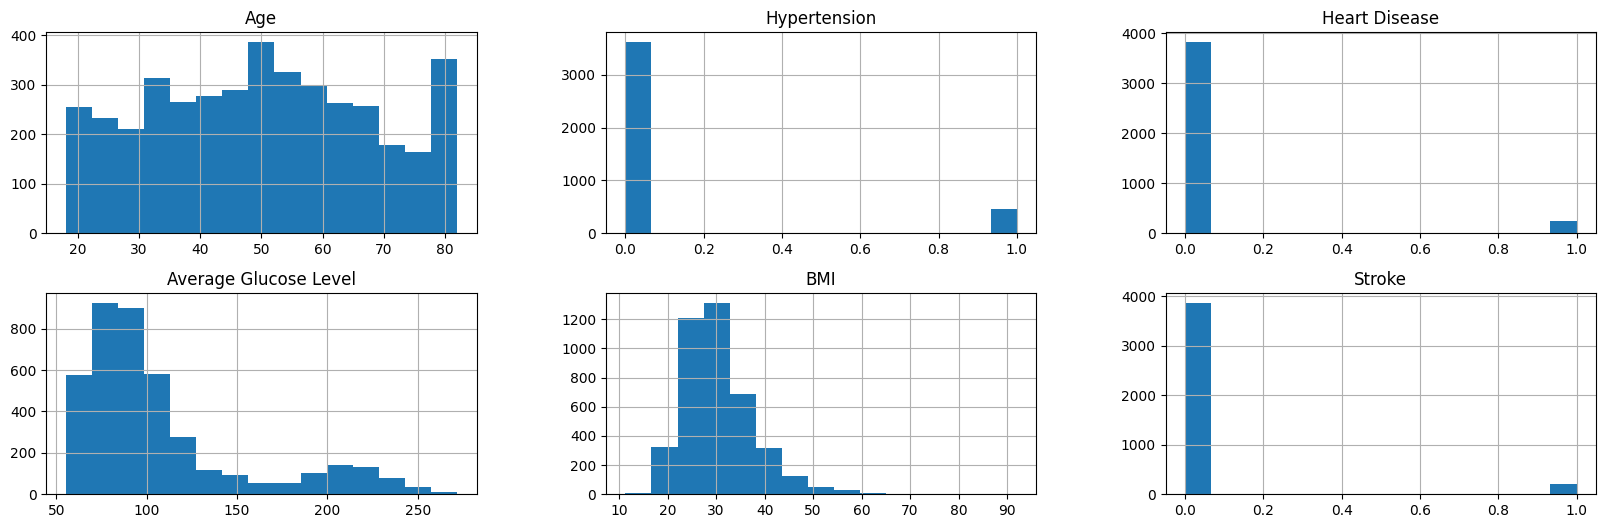

In [6]:
df.drop('ID', axis=1).hist(bins=15, figsize=(20, 6), layout=(2, 3))
plt.show()

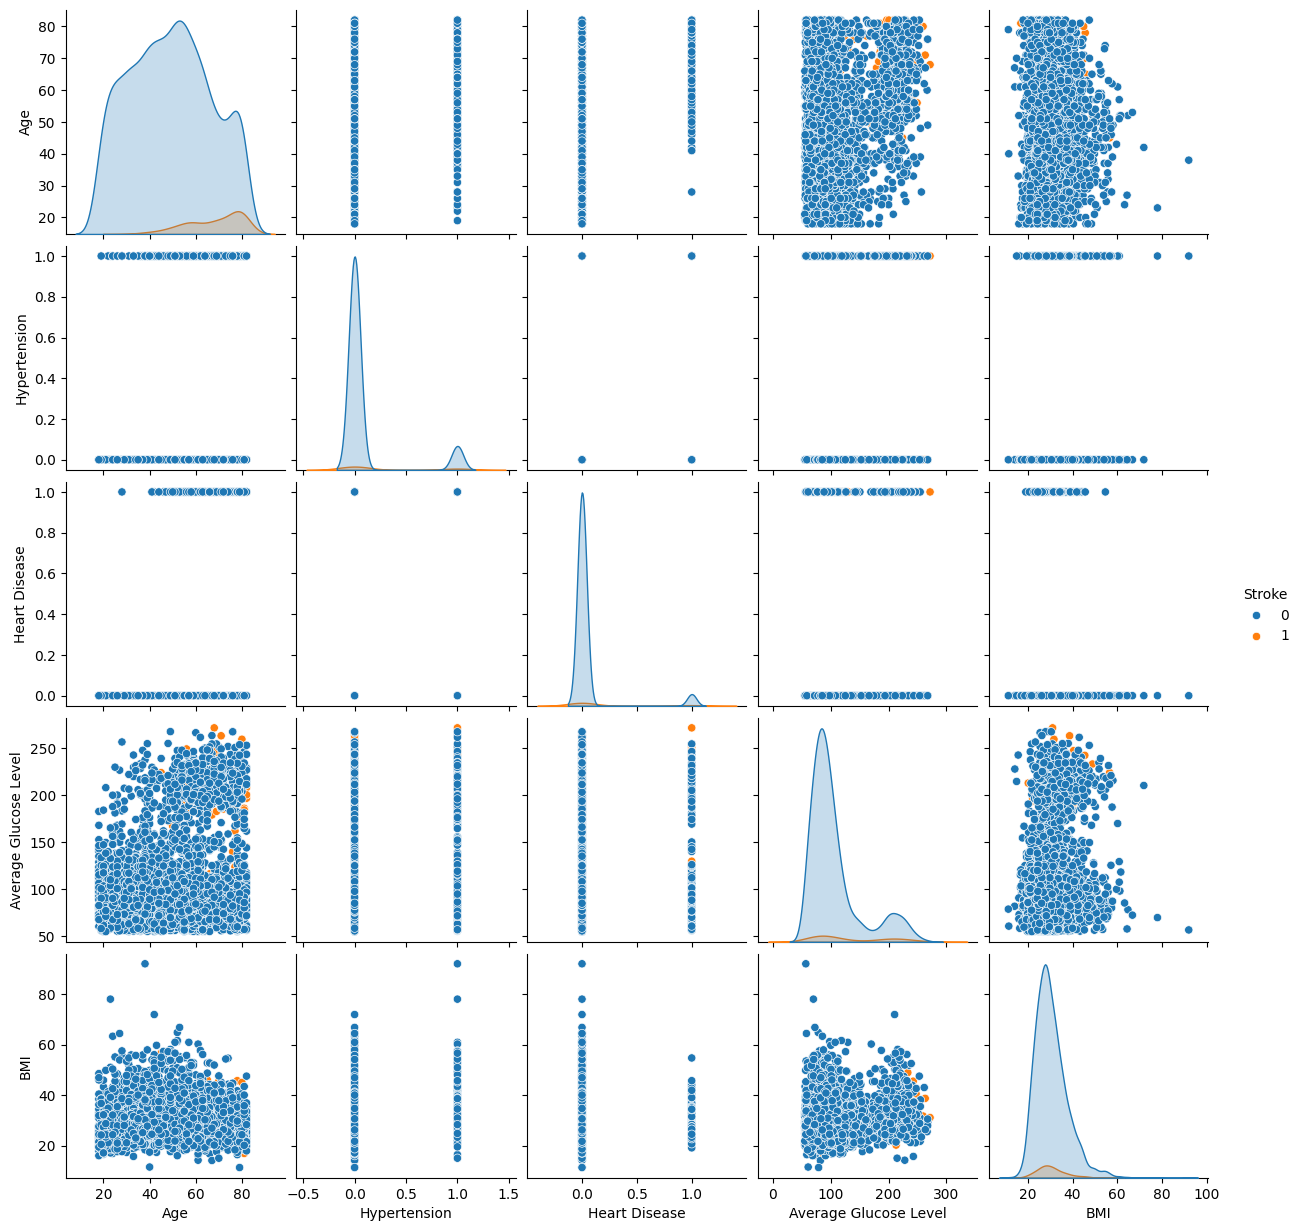

In [7]:
sns.pairplot(df.drop('ID', axis=1), hue="Stroke")
plt.show()

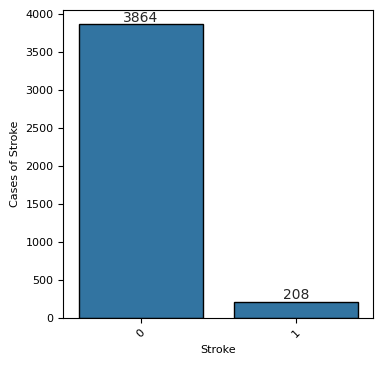

In [8]:
# About 5.1% of our population has had a stroke

plt.figure(figsize = (4, 4))
ax=sns.countplot(data=df, x=df.Stroke, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Cases of Stroke', size=8)
plt.yticks(size=8)
plt.xlabel('Stroke', size=8)
plt.xticks(size=8)
plt.xticks(rotation=45)
plt.show()
pd.reset_option('display.max_columns', 0)

In [9]:
df.Stroke.value_counts(normalize=True)

,proportion
Stroke,
0,0.948919
1,0.051081


<Axes: >

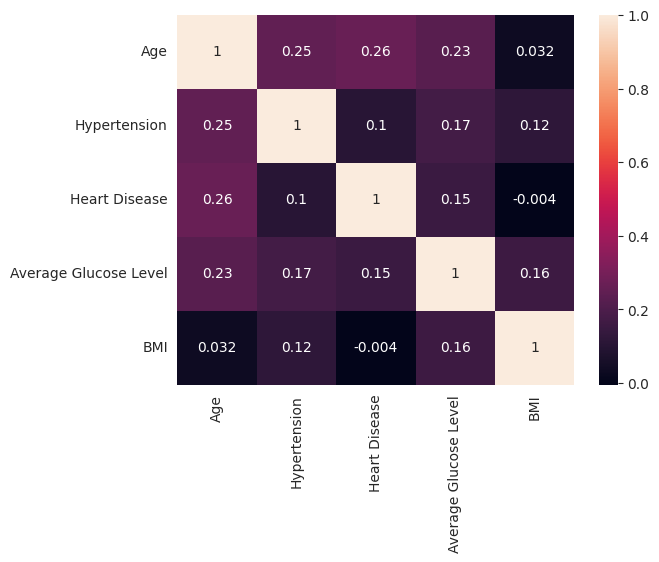

In [10]:
# Idenfity fields to see what highest correlation to Stroke
# Age and Heart Disease are the two features that are most related to a Stroke. As a note, Heart Disease is the leading cause of death globally according to the World Health Organization
# Hypertension is a leading feature as well.

corr = df.drop(['ID', 'Stroke'], axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [11]:
df['Gender'] = df['Gender'].replace('Male', 0)
df['Gender'] = df['Gender'].replace('Female', 1)
df['Gender'] = df['Gender'].astype(float)

df['Ever Married'] = df['Ever Married'].replace('No', 0)
df['Ever Married'] = df['Ever Married'].replace('Yes', 1)
df['Ever Married'] = df['Ever Married'].astype(float)

df['Residence Type'] = df['Residence Type'].replace('Rural', 0)
df['Residence Type'] = df['Residence Type'].replace('Urban', 1)
df['Residence Type'] = df['Residence Type'].astype(float)

df['Work Type'] = df['Work Type'].replace('Never_worked', -2)
df['Work Type'] = df['Work Type'].replace('children', -1)
df['Work Type'] = df['Work Type'].replace('Private', 0)
df['Work Type'] = df['Work Type'].replace('Self-employed', 1)
df['Work Type'] = df['Work Type'].replace('Govt_job', 2)
df['Work Type'] = df['Work Type'].astype(float)

df['Smoking Status'] = df['Smoking Status'].replace('Unknown', 0)
df['Smoking Status'] = df['Smoking Status'].replace('never smoked', 0)
df['Smoking Status'] = df['Smoking Status'].replace('formerly smoked', 1)
df['Smoking Status'] = df['Smoking Status'].replace('smokes', 2)
df['Smoking Status'] = df['Smoking Status'].astype(float)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4072 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4072 non-null   int64  
 1   Gender                 4072 non-null   float64
 2   Age                    4072 non-null   float64
 3   Hypertension           4072 non-null   int64  
 4   Heart Disease          4072 non-null   int64  
 5   Ever Married           4072 non-null   float64
 6   Work Type              4072 non-null   float64
 7   Residence Type         4072 non-null   float64
 8   Average Glucose Level  4072 non-null   float64
 9   BMI                    4072 non-null   float64
 10  Smoking Status         4072 non-null   float64
 11  Stroke                 4072 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 413.6 KB


<ipython-input-11-bf8557dd856d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace('Female', 1)
<ipython-input-11-bf8557dd856d>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Ever Married'] = df['Ever Married'].replace('Yes', 1)
<ipython-input-11-bf8557dd856d>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_o

# 3) Train / Test Data

In [12]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['ID', 'Stroke'])
y = df['Stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (3257, 10). Training labels size: (3257,)
Test set size: (815, 10). Test labels size: (815,)


<Figure size 400x300 with 0 Axes>

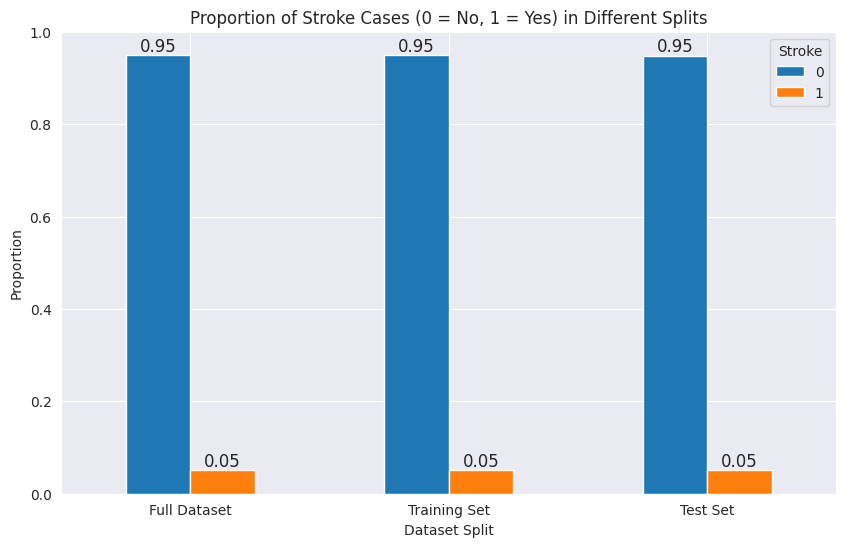

In [13]:
y_distribution_df = pd.DataFrame({
    'Full Dataset': df['Stroke'].value_counts(normalize=True),
    'Training Set': y_train.value_counts(normalize=True),
    'Test Set': y_test.value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Stroke Cases (0 = No, 1 = Yes) in Different Splits")
plt.xlabel("Dataset Split")
plt.ylabel("Proportion")
plt.legend(title="Stroke")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

<Figure size 400x300 with 0 Axes>

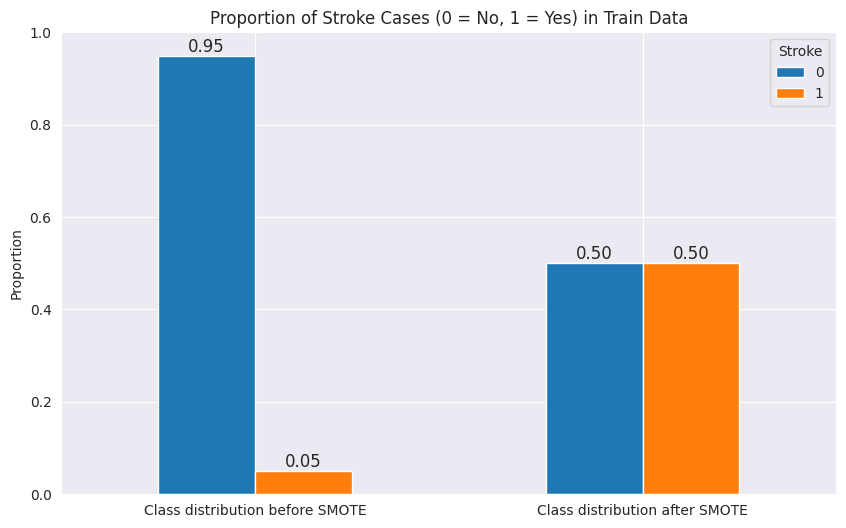

In [14]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

y_train_distribution_df = pd.DataFrame({
    'Class distribution before SMOTE': y_train.value_counts(normalize=True),
    'Class distribution after SMOTE': y_train_resampled.value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_train_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Stroke Cases (0 = No, 1 = Yes) in Train Data")
plt.ylabel("Proportion")
plt.legend(title="Stroke")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

In [15]:
y_train_resampled.value_counts(normalize = True)

,proportion
Stroke,
0,0.5
1,0.5


<Figure size 400x300 with 0 Axes>

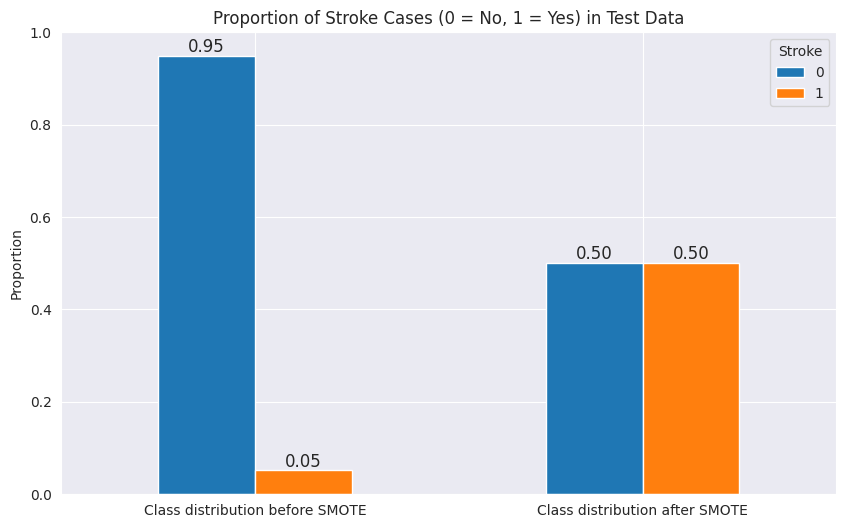

In [16]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

y_test_distribution_df = pd.DataFrame({
    'Class distribution before SMOTE': y_test.value_counts(normalize=True),
    'Class distribution after SMOTE': y_test_resampled.value_counts(normalize=True)
}).T

plt.figure(figsize=(4, 3))
ax = y_test_distribution_df.plot(kind='bar', figsize=(10, 6), rot=0)

plt.title("Proportion of Stroke Cases (0 = No, 1 = Yes) in Test Data")
plt.ylabel("Proportion")
plt.legend(title="Stroke")
plt.ylim(0, 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=12)

plt.show()

# 4) Modeling

Baseline Accuracy: 0.48
Baseline Precision: 0.48
Baseline Recall: 0.48
Baseline F1 Score: 0.48


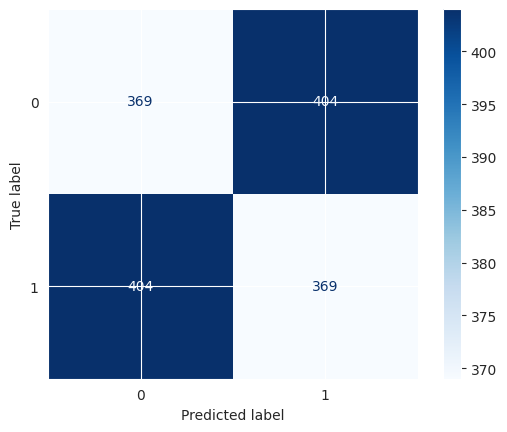

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

random_baseline = DummyClassifier(strategy='stratified')
random_baseline.fit(X_train_resampled, y_train_resampled)
y_random_pred = random_baseline.predict(X_test_resampled)

accuracy_baseline = accuracy_score(y_test_resampled, y_random_pred)
precision_baseline = precision_score(y_test_resampled, y_random_pred, average='binary', zero_division=0)
recall_baseline = recall_score(y_test_resampled, y_random_pred, average='binary', zero_division=0)
f1_baseline = f1_score(y_test_resampled, y_random_pred, average='binary', zero_division=0)
cm = confusion_matrix(y_test_resampled, y_random_pred)

print(f"Baseline Accuracy: {accuracy_baseline:.2f}")
print(f"Baseline Precision: {precision_baseline:.2f}")
print(f"Baseline Recall: {recall_baseline:.2f}")
print(f"Baseline F1 Score: {f1_baseline:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [18]:
# Based on the accuracy score Gradient Boosting is the best model to use as it has the highest Accuracy and Precision score.
results = []

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier # import GradientBoostingClassifier

preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Scale the data
])

# Calculate knn metrics
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test_resampled)
accuracy_knn = accuracy_score(y_test_resampled, y_pred)
precision_knn = precision_score(y_test_resampled, y_pred, average='binary', zero_division=0)
recall_knn = recall_score(y_test_resampled, y_pred, average='binary', zero_division=0)
f1_knn = f1_score(y_test_resampled, y_pred, average='binary', zero_division=0)
results.append({
   "Model": 'KNN',
   "Accuracy": accuracy_knn,
   "Precision": precision_knn,
   "Recall": recall_knn,
   "F1": f1_knn,
})

# Calculate logisticregression metrics
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test_resampled)
accuracy_logisticregression = accuracy_score(y_test_resampled, y_pred)
precision_logisticregression = precision_score(y_test_resampled, y_pred, average='binary', zero_division=0)
recall_logisticregression = recall_score(y_test_resampled, y_pred, average='binary', zero_division=0)
f1_logisticregression = f1_score(y_test_resampled, y_pred, average='binary', zero_division=0)
results.append({
   "Model": 'Logistic Regression',
   "Accuracy": accuracy_logisticregression,
   "Precision": precision_logisticregression,
   "Recall": recall_logisticregression,
   "F1": f1_logisticregression,
})

# Calculate SVC metrics
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test_resampled)
accuracy_SVC = accuracy_score(y_test_resampled, y_pred)
precision_SVC = precision_score(y_test_resampled, y_pred, average='binary', zero_division=0)
recall_SVC = recall_score(y_test_resampled, y_pred, average='binary', zero_division=0)
f1_SVC = f1_score(y_test_resampled, y_pred, average='binary', zero_division=0)
results.append({
   "Model": 'SVC',
   "Accuracy": accuracy_SVC,
   "Precision": precision_SVC,
   "Recall": recall_SVC,
   "F1": f1_SVC,
})

# Calculate DecisionTreeClassifier metrics
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test_resampled)
accuracy_DecisionTreeClassifier = accuracy_score(y_test_resampled, y_pred)
precision_DecisionTreeClassifier = precision_score(y_test_resampled, y_pred, average='binary', zero_division=0)
recall_DecisionTreeClassifier = recall_score(y_test_resampled, y_pred, average='binary', zero_division=0)
f1_DecisionTreeClassifier = f1_score(y_test_resampled, y_pred, average='binary', zero_division=0)
results.append({
   "Model": 'Decision Tree',
   "Accuracy": accuracy_DecisionTreeClassifier,
   "Precision": precision_DecisionTreeClassifier,
   "Recall": recall_DecisionTreeClassifier,
   "F1": f1_DecisionTreeClassifier
})

# Calculate RandomForestClassifier metrics
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test_resampled)
accuracy_RandomForestClassifier = accuracy_score(y_test_resampled, y_pred)
precision_RandomForestClassifier = precision_score(y_test_resampled, y_pred, average='binary', zero_division=0)
recall_RandomForestClassifier = recall_score(y_test_resampled, y_pred, average='binary', zero_division=0)
f1_RandomForestClassifier = f1_score(y_test_resampled, y_pred, average='binary', zero_division=0)
results.append({
   "Model": 'Random Forest',
   "Accuracy": accuracy_RandomForestClassifier,
   "Precision": precision_RandomForestClassifier,
   "Recall": recall_RandomForestClassifier,
   "F1": f1_RandomForestClassifier
})

# Calculate GradientBoostingClassifier metrics
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])
pipeline.fit(X_train_resampled, y_train_resampled)
y_pred = pipeline.predict(X_test_resampled)
accuracy_GradientBoostingClassifier = accuracy_score(y_test_resampled, y_pred)
precision_GradientBoostingClassifier = precision_score(y_test_resampled, y_pred, average='binary', zero_division=0)
recall_GradientBoostingClassifier = recall_score(y_test_resampled, y_pred, average='binary', zero_division=0)
f1_GradientBoostingClassifier = f1_score(y_test_resampled, y_pred, average='binary', zero_division=0)
results.append({
   "Model": 'Gradient Boosting',
   "Accuracy": accuracy_GradientBoostingClassifier,
   "Precision": precision_GradientBoostingClassifier,
   "Recall": recall_GradientBoostingClassifier,
   "F1": f1_GradientBoostingClassifier
})

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1
5,Gradient Boosting,0.946313,0.990057,0.901682,0.943805
4,Random Forest,0.904269,0.981510,0.824062,0.895921
2,SVC,0.818887,0.851641,0.772316,0.810041
3,Decision Tree,0.815653,0.919244,0.692109,0.789668
0,KNN,0.743855,0.806504,0.641656,0.714697
1,Logistic Regression,0.739974,0.724305,0.774903,0.748750


In [19]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]}),
    'randomforestclassifier': (RandomForestClassifier(), {'randomforestclassifier__n_estimators': [100, 200, 300]}),
    'gradientboostingclassifier': (GradientBoostingClassifier(), {'gradientboostingclassifier__n_estimators': [100, 200, 300]})}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Compute performance metrics on train and test sets
    y_train_pred = grid_search.best_estimator_.predict(X_train_resampled)
    y_test_pred = grid_search.best_estimator_.predict(X_test_resampled)

    # Evaluate on training and test sets
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_recall = recall_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test_resampled, y_test_pred)
    test_precision = precision_score(y_test_resampled, y_test_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test_resampled, y_test_pred, average='binary', zero_division=0)
    test_f1 = f1_score(y_test_resampled, y_test_pred, average='binary', zero_division=0)

    # Append the results
    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Train Accuracy": train_accuracy,
        "Train Precision": train_precision,
        "Train Recall": train_recall,
        "Train F1": train_f1,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1": test_f1,
    })

# Create the results DataFrame
results_hyper = pd.DataFrame(results)
results_hyper.sort_values(by="Test F1", ascending=False)

# Based on comparison using tuning the classifers for each model.


,Model,Best Params,Train Accuracy,Train Precision,Train Recall,Train F1,Test Accuracy,Test Precision,Test Recall,Test F1
5,gradientboostingclassifier,{'gradientboostingclassifier__n_estimators': 200},0.972663,0.997277,0.947913,0.971969,0.951488,0.990169,0.912031,0.949495
4,randomforestclassifier,{'randomforestclassifier__n_estimators': 300},1.000000,1.000000,1.000000,1.000000,0.907503,0.986111,0.826649,0.899367
2,svc,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.937237,0.938656,0.935620,0.937135,0.837646,0.896657,0.763260,0.824598
3,decisiontreeclassifier,{'decisiontreeclassifier__max_depth': 15},0.998382,0.998705,0.998059,0.998382,0.798836,0.918478,0.655886,0.765283
1,logisticregression,{'logisticregression__C': 0.1},0.755095,0.746022,0.773536,0.759530,0.738680,0.722557,0.774903,0.747815
0,knn,{'knn__n_neighbors': 3},0.963442,0.937138,0.993530,0.964510,0.717982,0.818526,0.560155,0.665131


In [20]:
# Select the best model (Graident Boosting)

models = {
    'gradientboostingclassifier': (GradientBoostingClassifier(), {'gradientboostingclassifier__n_estimators': [100, 200, 300]})}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Compute performance metrics on train and test sets
    y_train_pred = grid_search.best_estimator_.predict(X_train_resampled)
    y_test_pred = grid_search.best_estimator_.predict(X_test_resampled)

    # Evaluate on training and test sets
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    train_precision = precision_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_recall = recall_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)
    train_f1 = f1_score(y_train_resampled, y_train_pred, average='binary', zero_division=0)

    # Compute test metrics
    test_accuracy = accuracy_score(y_test_resampled, y_test_pred)
    test_precision = precision_score(y_test_resampled, y_test_pred, average='binary', zero_division=0)
    test_recall = recall_score(y_test_resampled, y_test_pred, average='binary', zero_division=0)
    test_f1 = f1_score(y_test_resampled, y_test_pred, average='binary', zero_division=0)

best_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])),
  ('gradientboostingclassifier',
   GradientBoostingClassifier(n_estimators=200))],
 'transform_input': None,
 'verbose': False,
 'preprocessor': Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())]),
 'gradientboostingclassifier': GradientBoostingClassifier(n_estimators=200),
 'preprocessor__memory': None,
 'preprocessor__steps': [('imputer', SimpleImputer()),
  ('scaler', StandardScaler())],
 'preprocessor__transform_input': None,
 'preprocessor__verbose': False,
 'preprocessor__imputer': SimpleImputer(),
 'preprocessor__scaler': StandardScaler(),
 'preprocessor__imputer__add_indicator': False,
 'preprocessor__imputer__copy': True,
 'preprocessor__imputer__fill_value': None,
 'preprocessor__imputer__keep_empty_features': False,
 'preprocessor__imputer__missing_values': nan,
 'preprocessor__imputer__strategy': 'mean',
 'preprocessor__sca

In [21]:
best_model_pred_y_train = best_model.predict(X_train_resampled)
best_model_pred_y_test = best_model.predict(X_test_resampled)
rf = best_model.fit(X_train_resampled, y_train_resampled)

Train set
Accuracy: 0.97
Precision: 1.00
Recall: 0.95
F1 Score: 0.97


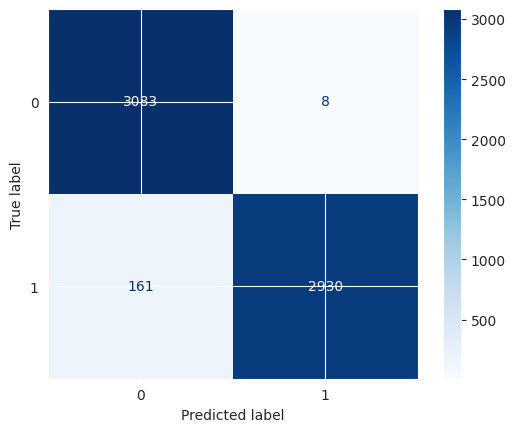

In [22]:
# Calculate metrics on train set
accuracy_train = accuracy_score(y_train_resampled, best_model_pred_y_train)
precision_train = precision_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
recall_train = recall_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
f1_train = f1_score(y_train_resampled, best_model_pred_y_train, average='binary', zero_division=0)
cm_train = confusion_matrix(y_train_resampled, best_model_pred_y_train)

print(f"Train set")
print(f"Accuracy: {accuracy_train:.2f}")
print(f"Precision: {precision_train:.2f}")
print(f"Recall: {recall_train:.2f}")
print(f"F1 Score: {f1_train:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

Test set
Accuracy: 0.95
Precision: 0.99
Recall: 0.91
F1 Score: 0.95


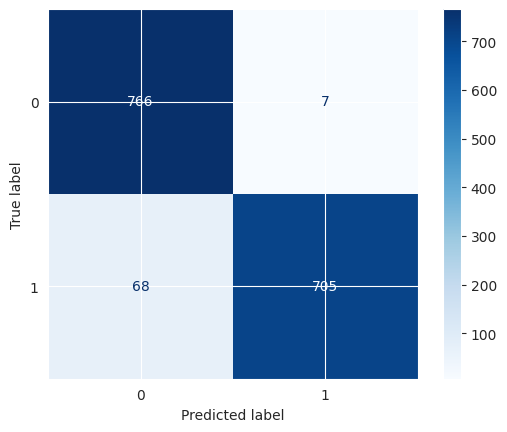

In [23]:
# Calculate metrics on test set
accuracy_test = accuracy_score(y_test_resampled, best_model_pred_y_test)
precision_test = precision_score(y_test_resampled, best_model_pred_y_test, average='binary', zero_division=0)
recall_test = recall_score(y_test_resampled, best_model_pred_y_test, average='binary', zero_division=0)
f1_test = f1_score(y_test_resampled, best_model_pred_y_test, average='binary', zero_division=0)
cm_test = confusion_matrix(y_test_resampled, best_model_pred_y_test)

print(f"Test set")
print(f"Accuracy: {accuracy_test:.2f}")
print(f"Precision: {precision_test:.2f}")
print(f"Recall: {recall_test:.2f}")
print(f"F1 Score: {f1_test:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.show()

In [24]:
models = {
    'gradientboostingclassifier': (GradientBoostingClassifier(), {'gradientboostingclassifier__n_estimators': [100, 200, 300]})}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', model)
])

# Fit the pipeline
pipeline.fit(X, y)

# Access the Random Forest model from the pipeline
rf_model = pipeline.named_steps['randomforestclassifier']  # 'rf' is the name of the Random Forest step

# Get feature importances
feature_importances = rf_model.feature_importances_

# Retrieve transformed feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Combine feature names with importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', 25)
print(importance_df.head(25))

                 Feature  Importance
7  Average Glucose Level    0.368275
1                    Age    0.362727
8                    BMI    0.136128
3          Heart Disease    0.037724
2           Hypertension    0.027934
5              Work Type    0.024498
4           Ever Married    0.016420
9         Smoking Status    0.010853
6         Residence Type    0.008689
0                 Gender    0.006752


# 5) Results

Main Takeaways
*   The model that performs the best is Gradient Boosting.
*   This model performs extremely well in predicting strokes, with an accuracy of 95%, a precision score of 99%, a recall score of 91%, and an F1-score of 0.95.
*   The features of most importance are Average Gluocose Level and Age.

Conclusions
*   We can use this model to flag and inform higher risk patients and have their doctor make recommendations.
*   We can also make dietary and lifestyle recommendations to younger patients with higher Average Glucose Levels as preventive measure.

Future Work
*   Track patients over time and calculate the true accuracy of our model.
*   Make adjustments to the model as new data is collected.